# TEAM : PTID-CDS-MAR22 -1284



### HOUSE-PRICE-PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm #tqdm is a library in Python which is used for creating Progress Meters or Progress Bars
tqdm.pandas()

from scipy.stats import norm #Python Scipy scipy. stats. norm object is used to analyze the normal distribution and calculate its different distribution function values using the different methods available.
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for column in data:           #Downcasting in float64 and int64,increase the processing speed
    if data[column].dtype =="float64":
        data[column]=pd.to_numeric(data[column],downcast="float")
    if data[column].dtype=="int64":
        data[column] = pd.to_numeric(data[column],downcast = "integer")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int16  
 1   MSSubClass     1460 non-null   int16  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float32
 4   LotArea        1460 non-null   int32  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int8   
 18  OverallC

## Basic Checks

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
data.describe().T # [.T]Transform rows and columns

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049957,24.284721,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685265,181.066681,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Handling missing values

<AxesSubplot:>

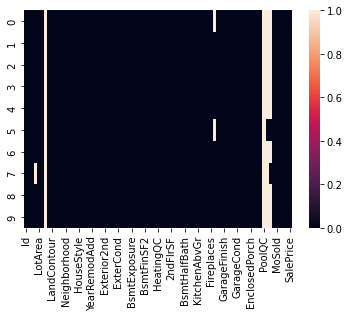

In [9]:
sns.heatmap(data.head(10).isnull())

In [10]:
data_null = pd.DataFrame(data.isnull().sum())
data_null.reset_index(drop = False, inplace = True)
data_null=data_null.rename(columns = {'index':'Features', 0:'Null values'})

In [11]:
data_null=data_null.sort_values(by = ['Null values'], ascending = False)
data_null.head(20)

,Features,Null values
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


* Droping column MiscFeature because it has 1406 missing values

* MiscFeature: Miscellaneous feature not covered in other categories

* Miscellaneous Property Assets means all contract rights, leases, concessions, warranties, plans, drawings and other items of intangible personal property relating to the ownership or operation of the Property and owned by Seller. 

In [12]:
data.drop(columns = ['MiscFeature'], inplace = True)

In [13]:
x = {'Feature':[], 'Len':[], 'Values':[]} # x:Temporary dictionary to filter unique values of each columns
for i in data:
    x['Feature'].append(i)
    x['Len'].append(len(data[i].unique()))
    x['Values'].append(data[i].unique())

In [14]:
dataset = pd.DataFrame(x) # Temporary dictionary(x) changed to dataframe(dataset)
dataset = dataset.sort_values(by = ['Len'], ascending = False).reset_index(drop = True) # sorted dataset in descending order by count of unique values

In [15]:
dataset.head(10)

,Feature,Len,Values
0,Id,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,LotArea,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
2,GrLivArea,861,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209..."
3,BsmtUnfSF,780,"[150, 284, 434, 540, 490, 64, 317, 216, 952, 1..."
4,1stFlrSF,753,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1..."
5,TotalBsmtSF,721,"[856, 1262, 920, 756, 1145, 796, 1686, 1107, 9..."
6,SalePrice,663,"[208500, 181500, 223500, 140000, 250000, 14300..."
7,BsmtFinSF1,637,"[706, 978, 486, 216, 655, 732, 1369, 859, 0, 8..."
8,GarageArea,441,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ..."
9,2ndFlrSF,417,"[854, 0, 866, 756, 1053, 566, 983, 752, 1142, ..."


In [16]:
dataset = dataset.merge(data_null, left_on = 'Feature', right_on = 'Features').drop(columns = 'Features')

In [17]:
pd.options.display.max_rows = 50

In [18]:
dataset

,Feature,Len,Values,Null values
0,Id,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0
1,LotArea,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",0
2,GrLivArea,861,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",0
3,BsmtUnfSF,780,"[150, 284, 434, 540, 490, 64, 317, 216, 952, 1...",0
4,1stFlrSF,753,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...",0
...,...,...,...,...
75,LandSlope,3,"[Gtl, Mod, Sev]",0
76,Alley,3,"[nan, Grvl, Pave]",1369
77,Street,2,"[Pave, Grvl]",0
78,CentralAir,2,"[Y, N]",0


In [19]:
dataset['Data Types'] = dataset.progress_apply(lambda x: data[x['Feature']].dtype, axis = 1)

  0%|          | 0/80 [00:00<?, ?it/s]

In [20]:
dataset['% of null values'] = dataset.progress_apply(lambda x: x['Null values'] / len(data) * 100,axis = 1)

  0%|          | 0/80 [00:00<?, ?it/s]

In [21]:
dataset.head()

,Feature,Len,Values,Null values,Data Types,% of null values
0,Id,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,int16,0.0
1,LotArea,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",0,int32,0.0
2,GrLivArea,861,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",0,int16,0.0
3,BsmtUnfSF,780,"[150, 284, 434, 540, 490, 64, 317, 216, 952, 1...",0,int16,0.0
4,1stFlrSF,753,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...",0,int16,0.0


##### Handling null values in numerical features

In [22]:
num_null_dt = dataset[(dataset['Data Types'] != 'object') & (dataset['Null values'] != 0)]# numerical columns & data measures having null values
num_null_col = dataset[(dataset['Data Types'] != 'object') & (dataset['Null values'] != 0)]['Feature'].tolist()# numerical columns having null values

In [23]:
num_null_col

['MasVnrArea', 'LotFrontage', 'GarageYrBlt']

In [24]:
num_null_dt

,Feature,Len,Values,Null values,Data Types,% of null values
10,MasVnrArea,328,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",8,float32,0.547945
16,LotFrontage,111,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",259,float32,17.739726
17,GarageYrBlt,98,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",81,float32,5.547945


In [25]:
for i in num_null_col:
    data[i].fillna(data[i].mean(), inplace = True)
# Replacing the null values with mean    

##### Handling null values in categorical features

In [26]:
cat_null_col_info = dataset[(dataset['Data Types'] == 'object') & (dataset['Null values'] != 0)].sort_values(by = '% of null values')
cat_null_col_info
# categorical columns having null values

,Feature,Len,Values,Null values,Data Types,% of null values
42,Electrical,6,"[SBrkr, FuseF, FuseA, FuseP, Mix, nan]",1,object,0.068493
56,MasVnrType,5,"[BrkFace, None, Stone, BrkCmn, nan]",8,object,0.547945
39,BsmtFinType1,7,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]",37,object,2.534247
59,BsmtQual,5,"[Gd, TA, Ex, nan, Fa]",37,object,2.534247
60,BsmtCond,5,"[TA, Gd, nan, Fa, Po]",37,object,2.534247
38,BsmtFinType2,7,"[Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]",38,object,2.602740
61,BsmtExposure,5,"[No, Gd, Mn, Av, nan]",38,object,2.602740
40,GarageType,7,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...",81,object,5.547945
43,GarageQual,6,"[TA, Fa, Gd, nan, Ex, Po]",81,object,5.547945
44,GarageCond,6,"[TA, Fa, nan, Gd, Po, Ex]",81,object,5.547945


*   Categorical columns with less than 10 % null values

In [27]:
nul_col_cat_less10_dt = cat_null_col_info[cat_null_col_info['% of null values'] < 10]
nul_col_cat_less10 = nul_col_cat_less10_dt['Feature'].tolist()
nul_col_cat_less10

['Electrical',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'GarageFinish']

nul_col_cat_less10_dt

In [28]:
for i in nul_col_cat_less10:
    data[i] = data[i].fillna(data[i].mode()[0])

- Categorical columns with more than 10 % null values

In [29]:
nul_col_cat_great10_dt = cat_null_col_info[cat_null_col_info['% of null values'] > 10]
nul_col_cat_great10 = nul_col_cat_great10_dt['Feature'].tolist()

In [30]:
nul_col_cat_great10

['FireplaceQu', 'Fence', 'Alley', 'PoolQC']

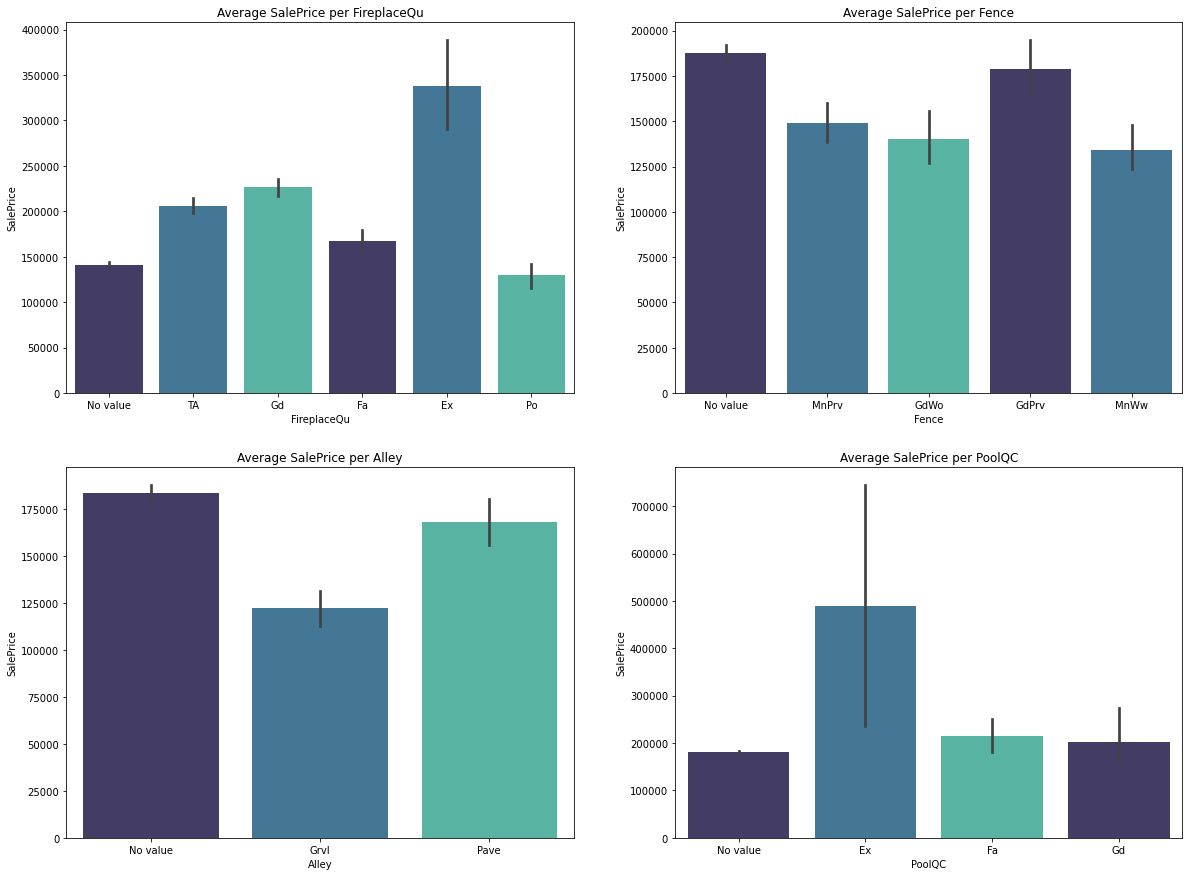

In [31]:
pal = sns.color_palette("mako", len(data[i].unique()))
plot_count = 1
plt.figure(figsize = (20,15))
for i in nul_col_cat_great10:
    plt.subplot(2,2,plot_count)
    plt.title("Average SalePrice per "+ i)
    sns.barplot(data = data[[i,'SalePrice']].fillna('No value'), x = i, y ='SalePrice', estimator = np.mean, palette = pal)
    plot_count += 1
    


##### Missing values are assigned as 'No value'
- On the basis of barplot analysis,features:'FireplaceQu', 'Fence', 'Alley', 'PoolQC' has a great influence on target variable(SalePrice).
##### Average SalePrice per FireplaceQu
- Value 'Po' makes less changes in the Saleprice compared to 'No value'.
##### Average SalePrice per Fence
- It's confirm that 'No value' makes a higher results in Saleprice compared to other values.
##### Average SalePrice per Alley
- Missing value or 'No value' gives top Saleprice value than 'Grvl' and 'Pave'.
##### Average SalePrice per PoolQC
- 'No value' in PoolQC throws Saleprice value near 200k and that is a highest value.

### Conclusion :
    - Each of these features has dependency with target variable.
    - Even the features has high percentage of null values, it is still significant.
    - Missing values should be replaced by mode of each feature columns.

In [32]:
for i in nul_col_cat_great10:
    data[i] = data[i].fillna(data[i].mode()[0]) # Mode value is imputed for null values

#### Dataset with zero null values 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int16  
 1   MSSubClass     1460 non-null   int16  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float32
 4   LotArea        1460 non-null   int32  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int8   
 18  OverallC

## EDA

<AxesSubplot:>

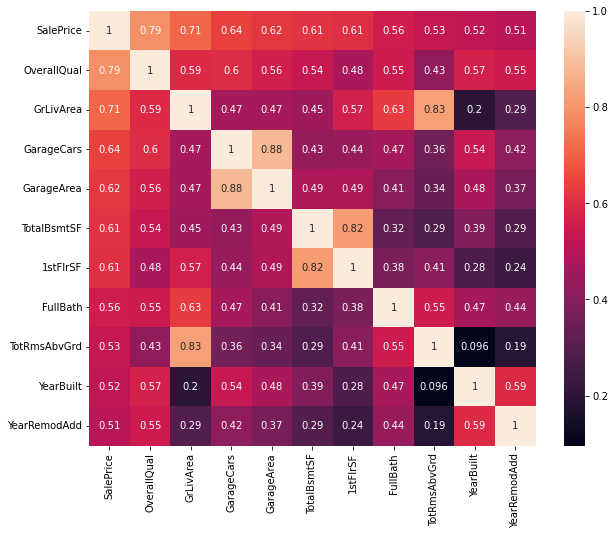

In [34]:
# Visvisualizing top most correlated  features to the SalePrice.
x=11 # Assuming the range at top 10
cols = data.corr().nlargest(x, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=[10, 8])
sns.heatmap(cm, yticklabels = cols.values, xticklabels = cols.values, annot = True)

### Insights
  * From the range of top 10 correlated features.
  * Features highly correlated each other.
    - GarageArea::GarageCars  
    - 1stFlrSF::TotalBsmtSF
    - TotRmsAbvGrd::GrLivArea
  * Hence we can drop features. 
    - GarageArea
    - 1stFlrSF
    - TotRmsAbvGrd  

In [35]:
cols =['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
# List of remaining features assumed
print(cols)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']


### Analysing distribution of target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

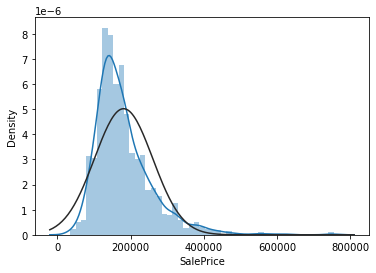

In [36]:
sns.distplot(data['SalePrice'], fit = norm)# Visvisualizing distribution of SalePrice

#### Insights

* Distribution as positive skewness
* This indicates that the dataset has outliers to handle

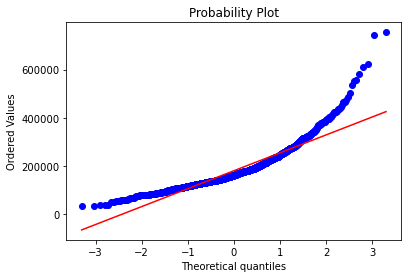

In [37]:
stats.probplot(data['SalePrice'], plot=plt)# scipy.stats.probplot shows normal distribution line by default
plt.show()

In [38]:
# Checking Skewness & Kurtosis for SalePrice
dist_temp = pd.DataFrame(index = ['Skewness', 'Kurtosis'], data = {'Normal':[data['SalePrice'].skew(), data['SalePrice'].kurt()]})
print(dist_temp) 
# If skewness is less than -1 or greater than 1, the distribution is highly skewed.
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

            Normal
Skewness  1.882876
Kurtosis  6.536282


In [39]:
# By applying Log-transformation
dist_temp1 = pd.DataFrame(index = ['Skewness', 'Kurtosis'], data = {'log':[np.log1p(data['SalePrice']).skew(), np.log1p(data['SalePrice']).kurt()]})
print(dist_temp1)

               log
Skewness  0.121347
Kurtosis  0.809519


- Using log-transformation can obtain lower values for skewness and kurtosis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

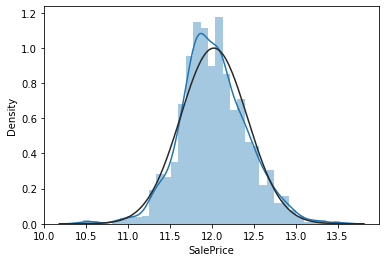

In [40]:
sns.distplot(np.log1p(data['SalePrice']), fit = norm)# Visvisualizing distribution of SalePrice(log-transformation applied)

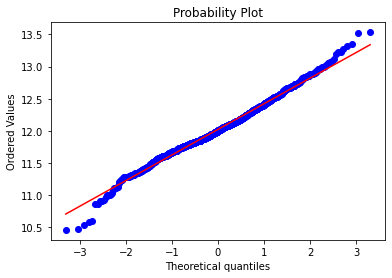

In [41]:
stats.probplot(np.log1p(data['SalePrice']), plot=plt)
# scipy.stats.probplot shows normal distribution line by default(log-transformation applied)
plt.show()

#### Analysing distribution of correlated features

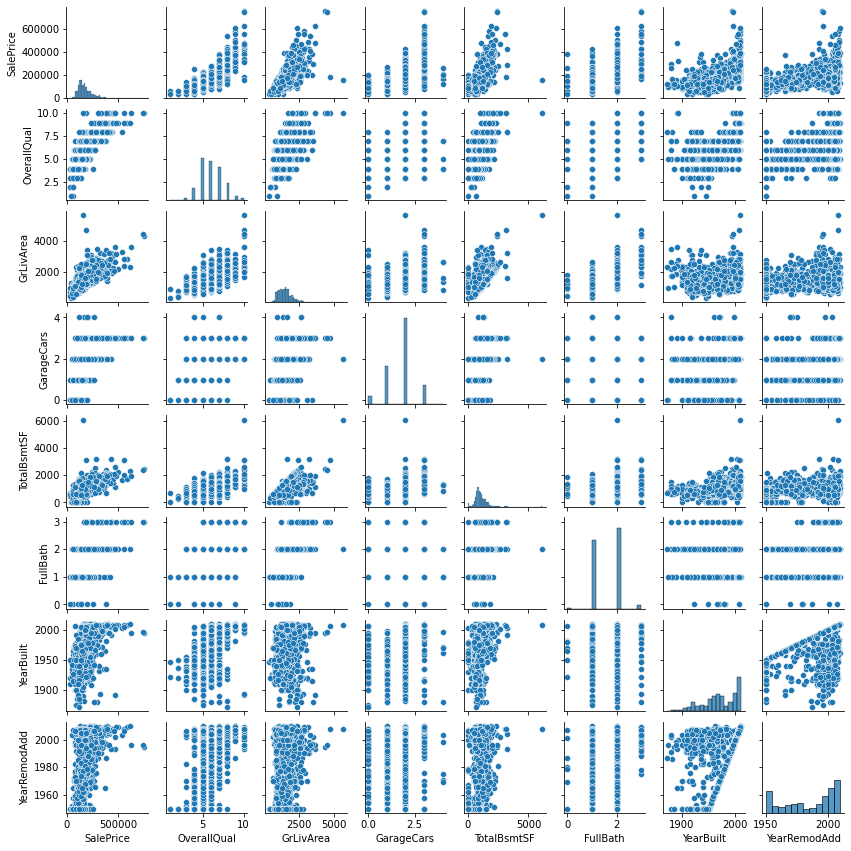

In [42]:
sns.pairplot(data[cols], height = 1.5)

### Outlier handling

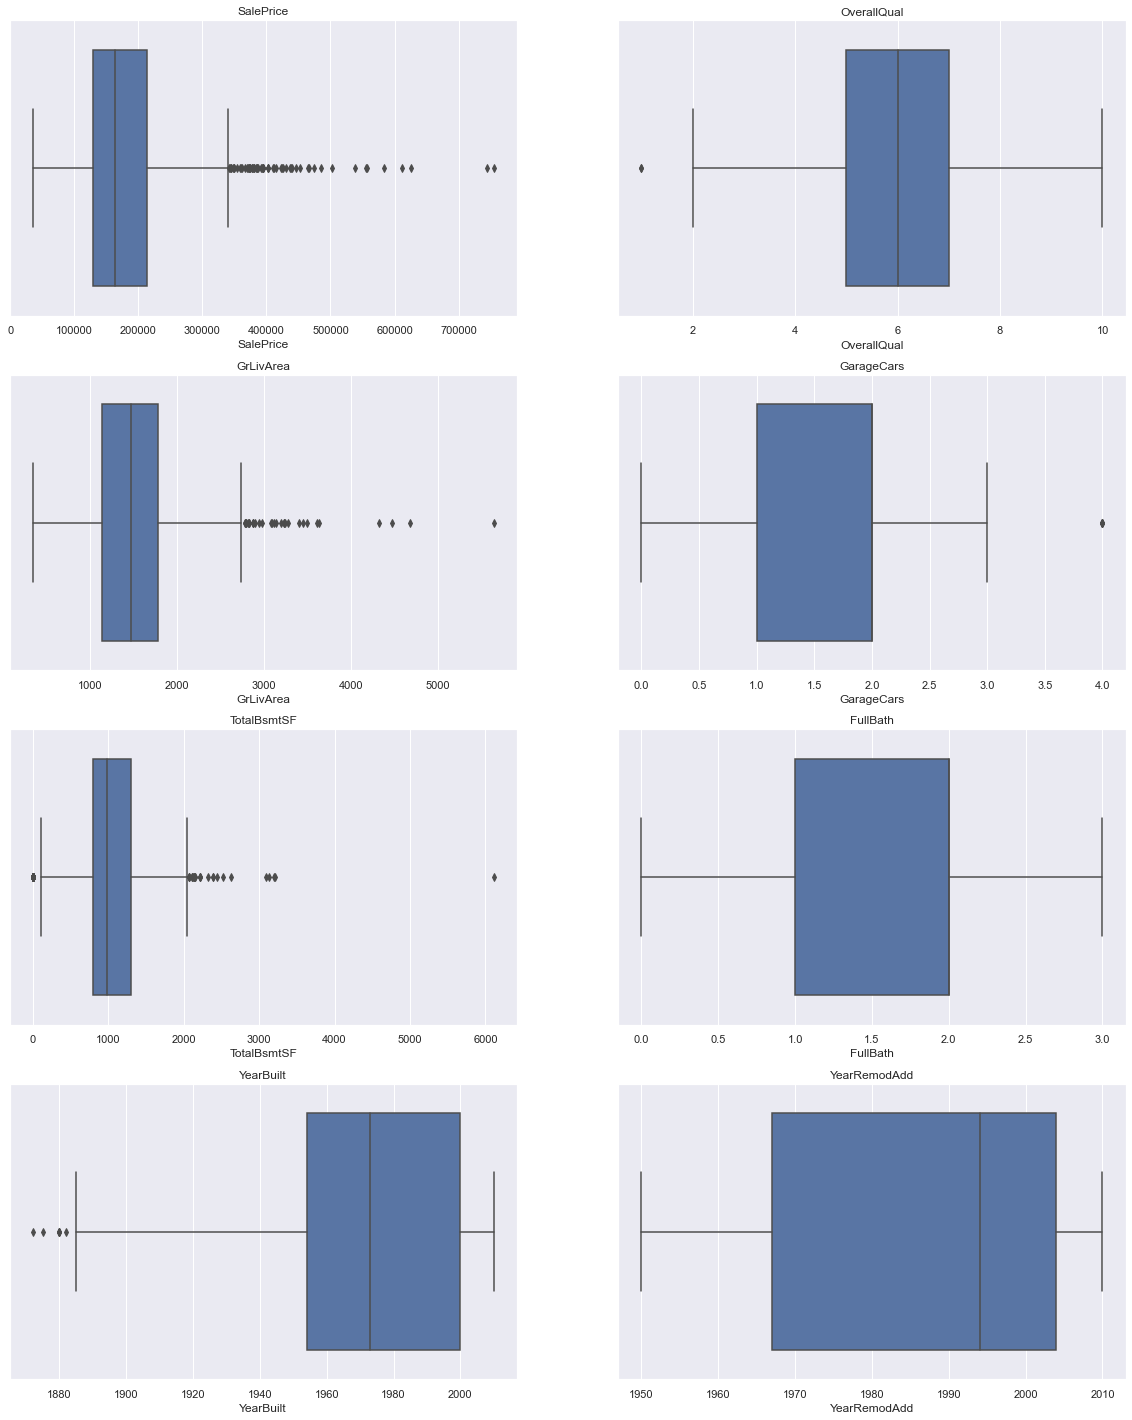

In [43]:
sns.set()
plot_count = 1
plt.figure(figsize = (20,25))
for i in cols:
    plt.subplot(4,2,plot_count)
    plt.title(i)
    sns.boxplot(data[i])# Visvisualizing outliers with boxplot
    plot_count += 1

#### Insights
* SalePrice above 500k is an outlier

### Executing insights to dataset

- Removing correlated columns

In [44]:
df= data[[ i for i in data.columns if i not in ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'Id']]] # dropping Id
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,GdPrv,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,4,2010,WD,Normal,142125


### Outlier handling above 500k saleprice

### Log-transformation applied on dataset

In [45]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,GdPrv,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,0,4,2010,WD,Normal,11.864469


In [46]:
pv=stats.shapiro(df['SalePrice'])
print(pv)
print(pv.pvalue)

ShapiroResult(statistic=0.9912054538726807, pvalue=1.1467612637261482e-07)
1.1467612637261482e-07


* p-value:0.0000009520167623122688

#### Transform categorical columns to numerical

In [47]:
df = pd.get_dummies(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [48]:
df.drop('SalePrice', axis = 1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


### Data model creation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##### Data splitting

In [50]:
X = df.drop('SalePrice', axis = 1) # Dataset without Saleprice
y = df['SalePrice'] # Dataset with only SalePrice

In [51]:
#!pip install statsmodels

In [52]:
import statsmodels.api as sm


In [53]:
X = sm.add_constant(X)

In [54]:
result = sm.OLS(y,X)

In [55]:
rslt=result.fit()

In [56]:
print(rslt.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     85.02
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:08:08   Log-Likelihood:                 1357.6
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1222   BIC:                            -981.1
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.04

##### Training and evaluation

In [57]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

* Creating a class 'Model' for applying ML algorithms.

In [58]:
print(train_x.shape,train_y.shape)

(1095, 282) (1095,)


In [59]:
from sklearn.metrics import r2_score, mean_squared_error
class Model:
    scores = {'Model':[], 'score-train':[], 'score-test':[],'r2_score-train':[], 'mse-train':[], 'r2_score-test':[], 'mse-test':[]}
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        
    def predict(self):
        self.model.fit(train_x, train_y)
        
        #training dataset pred
        pred_train = self.model.predict(train_x)
        score_train = self.model.score(train_x, train_y)
        r2_train = r2_score(train_y, pred_train)
        mse_train = mean_squared_error(train_y, pred_train)
        
        #testing dataset pred
        score_test = self.model.score(test_x, test_y)
        pred_test = self.model.predict(test_x)
        r2_test = r2_score(test_y, pred_test)
        mse_test = mean_squared_error(test_y, pred_test)
        
        self.performance(score_train, score_test, r2_train, mse_train, r2_test, mse_test)
    
    def performance(self, score_train, score_test, r2_train, mse_train, r2_test, mse_test):
    
        Model.scores['Model'].append(self.model_name)
        Model.scores['score-test'].append(score_test)
        Model.scores['score-train'].append(score_train)           
        Model.scores['r2_score-test'].append(r2_test)
        Model.scores['r2_score-train'].append(r2_train)
        Model.scores['mse-test'].append(mse_test)
        Model.scores['mse-train'].append(mse_train)
        
        print("**Training**")
        print(f'score: {score_train}')
        print(f'r2_score: {r2_train}')
        print(f'mse: {mse_train}')
        print("==========================================================")
        print("**Test**")
        print(f'score: {score_test}')
        print(f'r2_score: {r2_test}')
        print(f'mse: {mse_test}')

##### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

model = Model(LinearRegression(), 'Regression')
model.predict()

**Training**
score: 0.9463672972399138
r2_score: 0.9463672972399138
mse: 0.008386005153679701
**Test**
score: -195332973.1934266
r2_score: -195332973.1934266
mse: 32737322.16478271


##### XGBRegressor

In [61]:
from xgboost import XGBRegressor

model = Model(XGBRegressor(), 'XGBRegressor')
model.predict()

**Training**
score: 0.9996639565843838
r2_score: 0.9996639565843838
mse: 5.2543721837464017e-05
**Test**
score: 0.8887676592302725
r2_score: 0.8887676592302725
mse: 0.01864226452270959


##### DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

model = Model(DecisionTreeRegressor(), 'DecisionTreeRegressor')
model.predict()

**Training**
score: 1.0
r2_score: 1.0
mse: 8.645051016120677e-33
**Test**
score: 0.7214308977339187
r2_score: 0.7214308977339187
mse: 0.046687490853481825


##### KNeighborsRegressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor

model = Model(KNeighborsRegressor(), 'KNeighborsRegressor')
model.predict()

**Training**
score: 0.7743418558603608
r2_score: 0.7743418558603608
mse: 0.03528388953638795
**Test**
score: 0.6084695745354605
r2_score: 0.6084695745354605
mse: 0.06561952854439472


### SVM

In [64]:
from sklearn import svm

model = Model(svm.SVR(), 'svm')
model.predict()

**Training**
score: 0.7119118066469821
r2_score: 0.7119118066469821
mse: 0.04504544708439748
**Test**
score: 0.6842315844479361
r2_score: 0.6842315844479361
mse: 0.05292200352795723


### Ridge

In [65]:
from sklearn.linear_model import Ridge

model = Model(Ridge(alpha=1.0), 'Ridge')
model.predict()

**Training**
score: 0.9376298265526288
r2_score: 0.9376298265526288
mse: 0.009752195377981174
**Test**
score: 0.8970444411958025
r2_score: 0.8970444411958025
mse: 0.017255096386801796


### Summary

In [66]:
performance_df = pd.DataFrame(Model.scores)
performance_df.sort_values(by='r2_score-test', ascending=False, inplace=True)
performance_df.reset_index(drop = True, inplace = True)
performance_df

,Model,score-train,score-test,r2_score-train,mse-train,r2_score-test,mse-test
0,Ridge,0.937630,8.970444e-01,0.937630,9.752195e-03,8.970444e-01,1.725510e-02
1,XGBRegressor,0.999664,8.887677e-01,0.999664,5.254372e-05,8.887677e-01,1.864226e-02
2,DecisionTreeRegressor,1.000000,7.214309e-01,1.000000,8.645051e-33,7.214309e-01,4.668749e-02
3,svm,0.711912,6.842316e-01,0.711912,4.504545e-02,6.842316e-01,5.292200e-02
4,KNeighborsRegressor,0.774342,6.084696e-01,0.774342,3.528389e-02,6.084696e-01,6.561953e-02
5,Regression,0.946367,-1.953330e+08,0.946367,8.386005e-03,-1.953330e+08,3.273732e+07


## Automated Machine Learning

In [67]:
#!pip install tpot

* Tree-based Pipeline Optimization Tool, or TPOT for short, is a Python library for automated machine learning.

* TPOT uses a tree-based structure to represent a model pipeline for a predictive modeling problem, including data preparation and modeling algorithms and model hyperparameters.

In [68]:
scores = {'Model':[], 'score-train':[], 'score-test':[],'r2_score-train':[], 'mse-train':[], 'r2_score-test':[], 'mse-test':[]}

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV, RidgeCV, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: -0.013649798262456015
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.0, learning_rate="constant", loss="huber", penalty="elasticnet", power_t=1.0)),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="quantile", max_depth=9, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001)),
    StackingEstimator(estimator=RidgeCV()),
    ExtraTreesRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(train_x, train_y)
results = exported_pipeline.predict(test_x)

#training dataset pred
results = exported_pipeline.predict(train_x)
score_train = exported_pipeline.score(train_x, train_y)
r2_train = r2_score(train_y, results)
mse_train = mean_squared_error(train_y, results)

#testing dataset pred
results = exported_pipeline.predict(test_x)
score_test = exported_pipeline.score(test_x, test_y)
r2_test = r2_score(test_y, results)
mse_test = mean_squared_error(test_y, results)


scores['Model'].append('AutoML - 15 generation')
scores['score-train'].append(score_train)
scores['r2_score-train'].append(r2_train)
scores['mse-train'].append(mse_train)
scores['score-test'].append(score_test)
scores['r2_score-test'].append(r2_test)
scores['mse-test'].append(mse_test)

print("**Training**")
print(f'score: {score_train}')
print(f'r2_score: {r2_train}')
print(f'mse: {mse_train}')
print("==========================================================")
print("**Test**")
print(f'score: {score_test}')
print(f'r2_score: {r2_test}')
print(f'mse: {mse_test}')


**Training**
score: 0.9990386356783266
r2_score: 0.9990386356783266
mse: 0.00015031884915775776
**Test**
score: 0.9237016905156339
r2_score: 0.9237016905156339
mse: 0.012787407494981178


In [69]:
performance = pd.concat([performance_df,pd.DataFrame(scores)]).sort_values(by = ['r2_score-test'], ascending = False)
performance.reset_index(drop = True, inplace = True)
performance

,Model,score-train,score-test,r2_score-train,mse-train,r2_score-test,mse-test
0,AutoML - 15 generation,0.999039,9.237017e-01,0.999039,1.503188e-04,9.237017e-01,1.278741e-02
1,Ridge,0.937630,8.970444e-01,0.937630,9.752195e-03,8.970444e-01,1.725510e-02
2,XGBRegressor,0.999664,8.887677e-01,0.999664,5.254372e-05,8.887677e-01,1.864226e-02
3,DecisionTreeRegressor,1.000000,7.214309e-01,1.000000,8.645051e-33,7.214309e-01,4.668749e-02
4,svm,0.711912,6.842316e-01,0.711912,4.504545e-02,6.842316e-01,5.292200e-02
5,KNeighborsRegressor,0.774342,6.084696e-01,0.774342,3.528389e-02,6.084696e-01,6.561953e-02
6,Regression,0.946367,-1.953330e+08,0.946367,8.386005e-03,-1.953330e+08,3.273732e+07


### Summary

* The AutoML - 15 generation has the most favorable by it's scores

#### Exporting the best model

In [84]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [85]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.0, learning_rate="constant", loss="huber", penalty="elasticnet", power_t=1.0)),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="quantile", max_depth=9, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001)),
    StackingEstimator(estimator=RidgeCV()),
    ExtraTreesRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
)

In [86]:
set_param_recursive(exported_pipeline.steps, 'random_state', 1)
exported_pipeline.fit(train_x, train_y)

Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=LassoLarsCV(normalize=True))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=LassoLarsCV(normalize=False))),
                ('stackingestimator-3',
                 StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=1.0,
                                                          l1_ratio=0.0,
                                                          learning_rate='constant',
                                                          loss='huber',
                                                          penalty='elasticnet',
                                                          power_t=1.0,
                                                          rand...
                 StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75,
                                                                       loss='quantile',
                                

In [87]:
import pickle
pickle.dump(exported_pipeline, open('PRCP-1020-HousePricePred Model.pkl', 'wb'))

#### Checking the model

In [88]:
dat_model=pickle.load(open('PRCP-1020-HousePricePred Model.pkl', 'rb'))
dat_model.steps

[('stackingestimator-1',
  StackingEstimator(estimator=LassoLarsCV(normalize=True))),
 ('stackingestimator-2',
  StackingEstimator(estimator=LassoLarsCV(normalize=False))),
 ('stackingestimator-3',
  StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=1.0, l1_ratio=0.0,
                                           learning_rate='constant', loss='huber',
                                           penalty='elasticnet', power_t=1.0,
                                           random_state=1))),
 ('stackingestimator-4',
  StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75,
                                                        loss='quantile',
                                                        max_depth=9,
                                                        max_features=0.35000000000000003,
                                                        min_samples_leaf=10,
                                                        min_samples_split=11,
                     

In [90]:
res=dat_model.predict(X)

In [91]:
res=np.exp(res)-1
len(res)

1460